In [14]:
# get all the csvs that end with _deployments.csv in this directory
import glob
csvs = glob.glob('./*/[a-z]*_deployments.csv')
csvs

['./snapshot/snapshot_deployments.csv',
 './aragon/aragon_deployments.csv',
 './daostack/daostack_deployments.csv',
 './realms/realm_deployments.csv',
 './tally/tally_deployments.csv',
 './daohaus/dao_deployments.csv']

In [15]:
# concat into one dataframe
import pandas as pd
df = pd.concat([pd.read_csv(csv) for csv in csvs])
# reindex
df = df.reset_index(drop=True)
df

,platform,platform_id,name,additional,website,votes_count,proposals_count
0,snapshot,odidao.eth,ODI DAO,NaN,https://snapshot.org/#/odidao.eth,1.0,6.0
1,snapshot,olodao.eth,YING TG,https://www.partybid.app/buy/0xB74BE402fEfE6bb...,https://snapshot.org/#/olodao.eth,6.0,1.0
2,snapshot,onearth.eth,OnEarth DAO,"kevinonearth999, https://imagineonearth.xpandr...",https://snapshot.org/#/onearth.eth,6.0,3.0
3,snapshot,opyn11.eth,opyn11,NaN,https://snapshot.org/#/opyn11.eth,5.0,1.0
4,snapshot,partyplanningdao.eth,Party Planning DAO,NaN,https://snapshot.org/#/partyplanningdao.eth,1.0,1.0
...,...,...,...,...,...,...,...
21993,daohaus,0xff07943f171b826b3618982a6213f157fbc5e226,NaN,network: xdai version: 2.1,NaN,0.0,0.0
21994,daohaus,0xff3f8c0b98454306fb0bda57e5ae38cbfa66cc0d,array.finance CCO,network: xdai version: 2.1,NaN,123.0,122.0
21995,daohaus,0xff4b20d48a1e8f93bf6745de388547e731f96fd0,PRIDEdao,network: xdai version: 2.1,NaN,0.0,0.0
21996,daohaus,0xffb676765d521518ac5c0d4f4067a9db9b72901b,EmpanaDAO,network: xdai version: 2.0,NaN,0.0,3.0


In [16]:
# save to csv
df.to_csv('all_deployments.csv', index=False)

In [17]:
# what pct have names?
df[df['name'].notnull()].shape[0] / df.shape[0]

0.8573961269206292

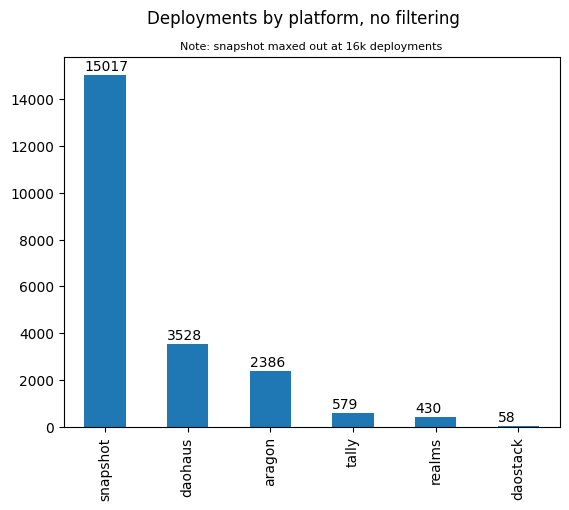

In [18]:
# platform vlaue counts annotated with count
import matplotlib.pyplot as plt
df['platform'].value_counts().plot(kind='bar')
# annotate
for i, v in enumerate(df['platform'].value_counts()):
    plt.text(i - .25, v + 200, str(v))
# title
plt.suptitle('Deployments by platform, no filtering')
plt.title('Note: snapshot maxed out at 16k deployments', fontsize=8)
plt.show()

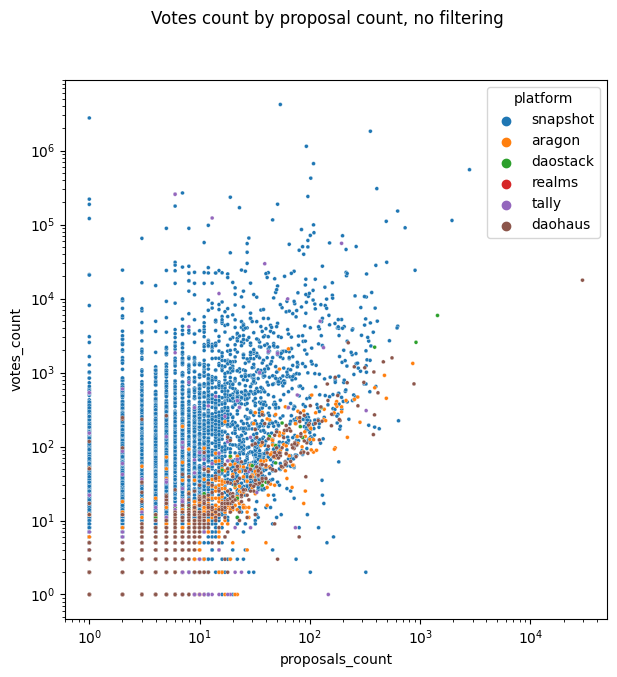

In [19]:
import seaborn as sns
f, ax = plt.subplots(figsize=(7, 7))
# small dots
sns.scatterplot(x='proposals_count', y='votes_count', hue='platform', data=df, s=8, ax=ax)
ax.set(xscale="log", yscale="log")
plt.suptitle('Votes count by proposal count, no filtering')
plt.show()

# Filtering

<Axes: ylabel='Frequency'>

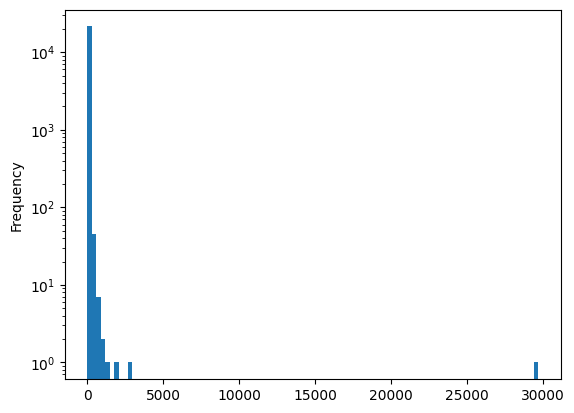

In [20]:
# hist of proposals_count, log scale
df['proposals_count'].plot(kind='hist', bins=100, logy=True)

<Axes: ylabel='Frequency'>

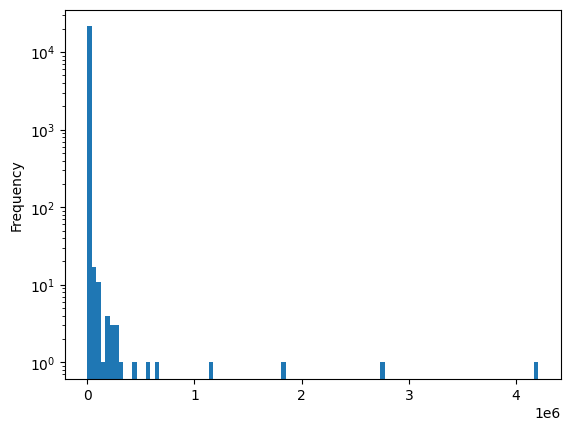

In [21]:
# hist of votes_count, log scale
df['votes_count'].plot(kind='hist', bins=100, logy=True)

In [22]:
df.shape

(21998, 7)

In [23]:
# keep only the daos that have more than ten votes and more than ten proposals
# filtered_df = df[(df['proposals_count'] > 10) & (df['votes_count'] > 10)]
# filtered_df.shape

In [24]:
# if we filtered by 50 and 50?
df[(df['proposals_count'] > 50) & (df['votes_count'] > 50)].shape

(495, 7)

In [25]:
# 50 votes and 10 proposals
filtered_df = df[(df['proposals_count'] > 10) & (df['votes_count'] > 50)]
filtered_df.shape

(1645, 7)

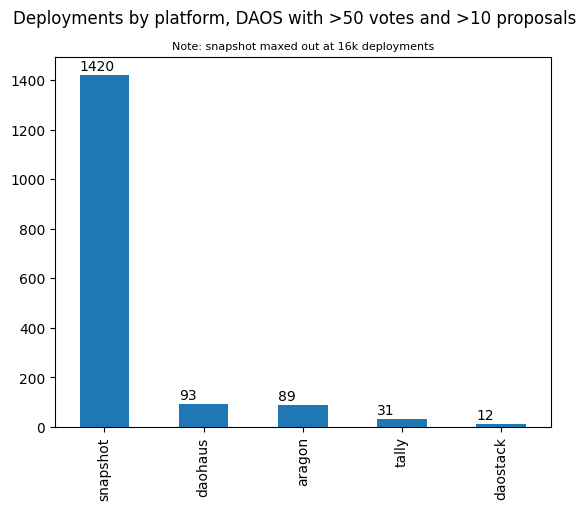

In [26]:
# platform vlaue counts annotated with count
import matplotlib.pyplot as plt
filtered_df['platform'].value_counts().plot(kind='bar')
# annotate
for i, v in enumerate(filtered_df['platform'].value_counts()):
    plt.text(i - .25, v + 20, str(v))
# title
plt.suptitle('Deployments by platform, DAOS with >50 votes and >10 proposals')
plt.title('Note: snapshot maxed out at 16k deployments', fontsize=8)
plt.show()

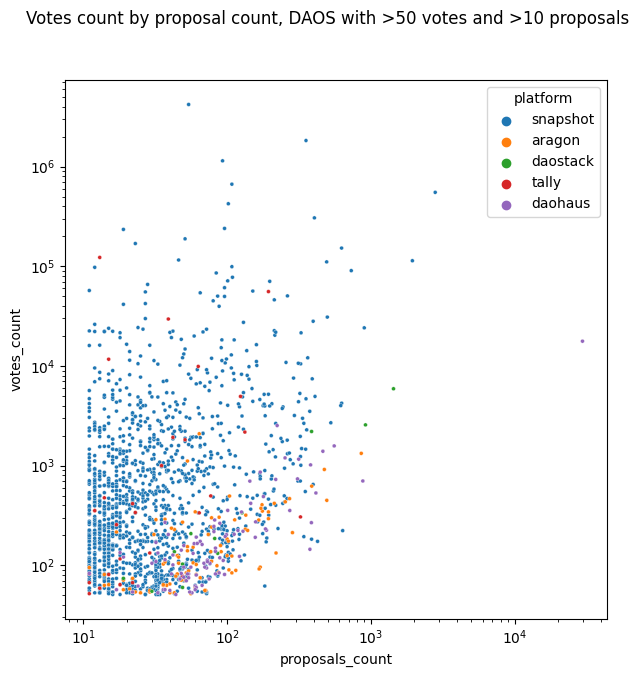

In [27]:
# run the charts again
f, ax = plt.subplots(figsize=(7, 7))
# small dots
sns.scatterplot(x='proposals_count', y='votes_count', hue='platform', data=filtered_df, s=8, ax=ax)
ax.set(xscale="log", yscale="log")
plt.suptitle('Votes count by proposal count, DAOS with >50 votes and >10 proposals')
plt.show()